# Import et fonction de nettoyage de texte

In [32]:
import re
import numpy as np
import itertools
import pandas as pd
import numpy as np
import re
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import csv 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")

from utility import euclidean
from utility import find_similar

In [33]:
def create_unique_word_dict(text:list) -> dict:
    """
    Dictionnaire de mot unique, les clés sont les mots et les valeurs sotn les indices des mots
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"`\,<>./?@#$%^&*_“|+=~σ''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', ' http','arxiv','org', 'of']
    )->list:
    """
    Nettoyage du text, stop words et caractères.
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

In [34]:
def file_dict(filename):

    
    if filename=='input/arxiv_test.csv':
        
        with open(filename,encoding='utf8') as fichier:
            lines= fichier.readlines()
            texts=[]
            for i in lines:
                texts+=[i.split('|')[1]+' '+ i.split('|')[4]]
    else:
        texts = pd.read_csv(filename,error_bad_lines=False)
        texts = [x for x in texts['text']]#liste des lignes
        
    word_lists = []
    all_text = []

    for text in texts:

    # Cleaning the text
        text = text_preprocessing(text)
        all_text += text
    unique_word_dict = create_unique_word_dict(all_text)

    return(all_text,unique_word_dict)

In [35]:
file='input/sample.csv'
#print(file_dict(file)[0])

#print(file_dict(file)[1])

# Préparation des données

In [36]:
def create_X(text,dict):
    V=len(text)
    X=np.zeros((V,len(dict)))
    indice=0
    for i in text:
        for cle, valeur in dict.items():
            if i==cle :
                
                X[indice,valeur]=1
        indice+=1
    return X

c'est ici que l'éxecution est longue (pour la création de A et X)

In [37]:
A=create_X(file_dict(file)[0],file_dict(file)[1])

X=[]
for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        if A[i,j]==1 :
            X.append(j)
            
# X listes des indices 

In [38]:
#liste des groupes de 3 mots
def context_list(X,context):
    list=[]
    for i in range(len(X)-context+1):
        list.append(X[i:i+context])
    return list

Voici es données d'entrée

In [39]:
#print(context_list(X,3))

In [40]:
def vectoword(X,dict): #avec le hot vector je récupère le mot
    c=0
    d=''
    for i in range(len(X)):
        if X[i]==1:
            c=i
    for cle, valeur in dict.items():
        if valeur==c:
            d=cle
    return d
def vectoword2(i,dict): #avec l'indice je récupère le mot
    c=i
    d=''
    for cle, valeur in dict.items():
        if valeur==c:
            d=cle
    return d

In [41]:
print(vectoword2(X[0],file_dict(file)[1]))

future


Pour Y, les sorties, je n'ai besoin que de reprendre les vecteurs de la matrice A correspondant.

In [42]:
#données
n=4
x=context_list(X,3)
Y=A[3:,]
y=[]
for i in range(np.shape(Y)[0]):
    y.append(Y[i])
x=x[:-1]
dict_size=len(file_dict(file)[1])
nb_features=100
h=100

In [43]:
x=np.array(x)
y=np.array(y)
y.shape

(36, 21)

# Réseau 

In [44]:
np.random.seed(0)
import Neuralword as Neur
from Neuralword import ilogit
L1 = Neur.Project_and_concat(nb_features,dict_size)
#print(self.C)
print(np.shape(L1.forward(x)))
#print(dict_size)
print(np.shape(y))
#print(x)

(300, 36)
(36, 21)


In [45]:
#N=Neur.Network([Neur.Project_and_concat(nb_features,dict_size),Neur.Dense(3*nb_features,h),Neur.tanh(),
         #       Neur.Dense(h,dict_size)])
#print(np.shape((N.forward(x).T)))



#print(np.shape(Neur.ilogit(N.forward(x)).T)[0])

#np.sum((Neur.ilogit(N.forward(x)).T),axis=1)


#for i range(np.shape(Y)[0]):
    

    
    
#print(np.shape(N.forward(x)))
#np.shape(ilogit(N.forward(x)))
#Z=Neur.ilogit(N.forward(x))

#print(np.sum(Z.T,axis=1))
#print(np.shape(np.sum(Z.T,axis=1)))
#print(len(y))

#print(np.shape(V))
#yn=np.array(y)
#yt=yn.T
#print(np.shape(x))
#print(np.shape(yt))



In [46]:
N=Neur.Network([Neur.Project_and_concat(nb_features,dict_size),
                Neur.Dense(3*nb_features,h),Neur.tanh(),Neur.Dense(h,dict_size)])
#N_a=Neur.Network([N,Neur.Ilogit_and_KL(yt)])



#Z1=L1.forward(x)
#print(Z1)

#Z1=L1.forward(x)
#print(Z1)


#print(np.shape(L1[0]))
#print(np.shape(L2[0]))
#print(np.shape(L3[0]))
#print(np.shape(L4[0]))

#L=N_a.forward(x)

#G1=N_a.list_layers[-1].backward(L)

#print(np.shape(G1[1]))

#G2=N_a.list_layers[-2].list_layers[-1].backward(G1[1])
#G3=N_a.list_layers[-2].list_layers[-2].backward(G2[1])
#G4=N_a.list_layers[-2].list_layers[-3].backward(G3[1])
#G5=N_a.list_layers[-2].list_layers[-4].backward(G4[1])

#print(np.shape(G5[0]))

#Z=N_a.backward(L)

#print(L)

#print(x)
#print(Z[0].shape)

#Z=N.forward(x)
#print(x.shape)
#print(Z.shape)
#print(y.shape)
#print(Z)

In [47]:
def plot_N(N):
    Z=N.forward(x)
    V=ilogit(Z)
    m=0
    for i in range(len(y)):
        m=np.argmax(V[:,i])
        print(vectoword(y[i],file_dict('input/arxiv_test.csv')[1]) + " prédit par " + vectoword2(m,file_dict('input/arxiv_test.csv')[1]))

## Train test split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2) 


In [49]:
print(np.shape(x))
print(np.shape(X_train))

(36, 3)
(28, 3)


In [50]:
N=Neur.Network([Neur.Project_and_concat(nb_features,dict_size),
                Neur.Dense(3*nb_features,h),Neur.tanh(),Neur.Dense(h,dict_size)])
N_a=Neur.Network([N,Neur.Ilogit_and_KL(Y_train[0:128].T)])


In [51]:
#L=N.forward(X_train)
#np.shape(N_a.backward(None)[0])

In [52]:
def accuracy(x, y):
        Z=ilogit(N.forward(x))
        y_preds = np.argmax(Z, axis=0)
        y_real= np.argmax(y.T, axis=0)
        acc = np.mean(y_preds == y_real)
        return acc 

In [53]:
print(np.shape(X_train))
print(np.shape(Y_train))

(28, 3)
(28, 21)


In [65]:
theta=np.random.randn(N.nb_params)
N.set_params(theta)
acc=[]
loss=[]
epochs=np.arange(1,200,1)
#choix d'un pas
dt=0.01/15
batchsize=5
n_batch=int(X_train.shape[0]/batchsize)+1
for i in epochs:
   # print("epoch{}".format(i))
    for j in range(0,n_batch):
        Xbatch=X_train[j*batchsize:min((j+1)*batchsize,X_train.shape[0])]
        Ybatch=Y_train[j*batchsize:min((j+1)*batchsize,X_train.shape[0])]
        N_a=Neur.Network([N,Neur.Ilogit_and_KL(Ybatch.T)])
        deltaY=N_a.forward(Xbatch)
        grad=N_a.backward(None)[0]
        theta=theta-dt*grad
        N_a.set_params(theta)
        N.set_params(theta)
    acc.append(accuracy(X_train,Y_train))
    N_a=Neur.Network([N,Neur.Ilogit_and_KL(Y_train.T)])
    loss.append(N_a.forward(X_train))
    #if i%40==0:
        #plot_N(N)
        #print("-----------------")
    #print(loss[-1])
print("fin")

fin


1.0


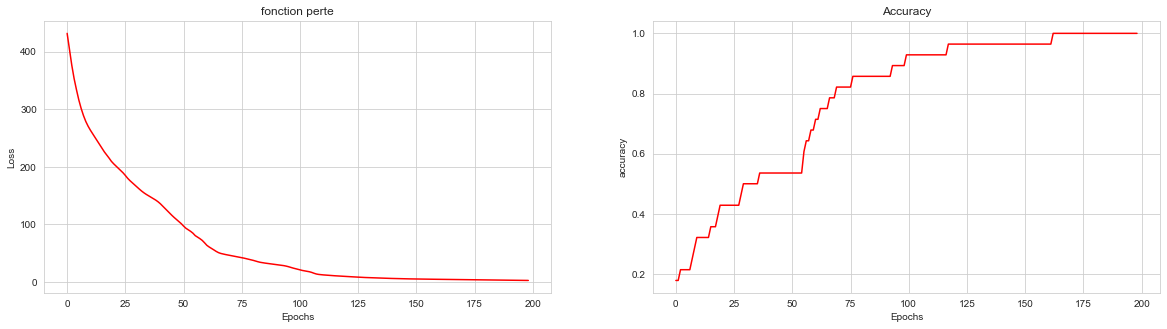

In [66]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss,color='r')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("fonction perte");
ax = fig.add_subplot(1,2,2)
ax.plot(acc,color='r')
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
ax.set_title("Accuracy");

#Z=ilogit(N.forward(X_train))
#y_preds = np.argmax(Z, axis=0)
#y_real= np.argmax(yt, axis=0)

print(acc[-1])

In [67]:
print("sur l'échantillon test :")
Z=ilogit(N.forward(X_test))
y_preds = np.argmax(Z, axis=0)
y_real= np.argmax(Y_test.T, axis=0)
#print(y_real)

#print(y_preds)

print(accuracy(X_test,Y_test))

sur l'échantillon test :
0.125


## embedding

In [68]:
emb=N.list_layers[0].get_params()
emb=emb.reshape((dict_size, nb_features))
emb.shape

(21, 100)

In [69]:

words = list(file_dict(file)[1])
unique_word_dict=file_dict(file)[1]
# dictionnaire des embedding. la clé est un mot unique et la valeur est un vecteur.
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: emb[unique_word_dict.get(word)]
        })

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
C = pca.fit(emb).transform(emb)



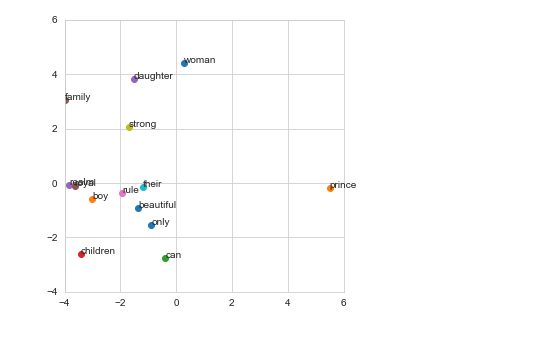

In [71]:
plt.figure(figsize=(5,5))
for i, j , word in zip(C[:,0], C[:,1],list(unique_word_dict.keys())):
    plt.plot(i, j, "o")
    plt.annotate(word, (i, j))
plt.axis((-4,6,-4,6))  
plt.show()


## Tensorflow

In [71]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
n_classes = dict_size
n_hidden = h
print(dict_size)

697


In [72]:
concat=Neur.Project(nb_features,dict_size)
a=concat.forward(x)
a.shape


(1411, 3, 100)

In [73]:
KX_train,KX_test,KY_train,KY_test=train_test_split(a,y,test_size=0.25)

In [74]:
# %load solutions/mlp_keras.py
keras_model = Sequential()
keras_model.add(Flatten())
keras_model.add(Dense(n_hidden, input_dim=a.shape[0], activation='tanh'))
keras_model.add(Dense(dict_size, activation='softmax'))

keras_model.compile(optimizer='adam',
                    loss='categorical_crossentropy', metrics=['accuracy'])

history = keras_model.fit(KX_train,(KY_train), epochs=15, batch_size=3, validation_data = (KX_test,(KY_test)))
keras_model.summary()

Epoch 1/15
353/353 [==============================] - 1s 2ms/step - loss: 6.5601 - accuracy: 0.0075 - val_loss: 6.4841 - val_accuracy: 0.0283
Epoch 2/15
353/353 [==============================] - 1s 1ms/step - loss: 5.2548 - accuracy: 0.4053 - val_loss: 6.4796 - val_accuracy: 0.0538
Epoch 3/15
353/353 [==============================] - 1s 1ms/step - loss: 3.9561 - accuracy: 0.6763 - val_loss: 6.5089 - val_accuracy: 0.0538
Epoch 4/15
353/353 [==============================] - 1s 1ms/step - loss: 2.7042 - accuracy: 0.8052 - val_loss: 6.5423 - val_accuracy: 0.0680
Epoch 5/15
353/353 [==============================] - 1s 1ms/step - loss: 1.6692 - accuracy: 0.9007 - val_loss: 6.5932 - val_accuracy: 0.0765
Epoch 6/15
353/353 [==============================] - 1s 1ms/step - loss: 0.8969 - accuracy: 0.9569 - val_loss: 6.6760 - val_accuracy: 0.0822
Epoch 7/15
353/353 [==============================] - 1s 1ms/step - loss: 0.5014 - accuracy: 0.9641 - val_loss: 6.7622 - val_accuracy: 0.0822
Epoch 

In [75]:
keras_loss=history.history["loss"]
keras_acc=history.history["accuracy"]

keras_valloss=history.history["val_loss"]
keras_valacc=history.history["val_accuracy"]

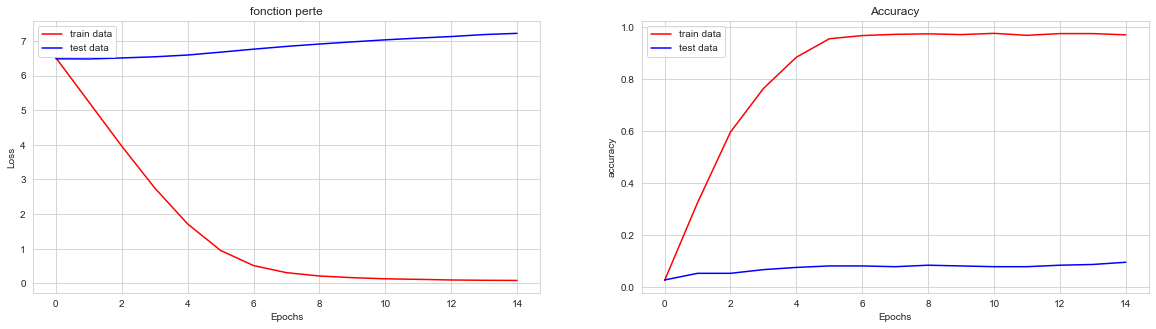

In [76]:
sb.set_style("whitegrid")
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(keras_loss,color='r',label="train data")
ax.plot(keras_valloss,color='b',label="test data")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("fonction perte");
ax.legend(loc='best')
ax = fig.add_subplot(1,2,2)
ax.plot(keras_acc,color='r',label="train data")
ax.plot(keras_valacc,color='b',label="test data")
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
ax.set_title("Accuracy");
ax.legend(loc='best')
#Z=ilogit(N.forward(X_train))
#y_preds = np.argmax(Z, axis=0)
#y_real= np.argmax(yt, axis=0)


In [77]:
weights = keras_model.get_weights()[0]

print(weights.shape)


(300, 100)


IndexError: index 300 is out of bounds for axis 0 with size 300

In [ ]:
v1=embedding_dict.get('future')
v2=embedding_dict.get('son')
euclidean(v1,v2)